In [1]:
import pandas as pd
data = pd.read_excel('pre_analysis_last.xlsx')

In [2]:
data.head()

,Hospital,CH,AF,IC,embryo_count,avg_age,hospital_location,patient_count,problem_count,problem_rate,CH-RATE,AF-RATE,IC-RATE,hospital_id
0,IVMED FERTILITY CENTER,165,11,171,3768,38.99,0,949,347,0.0921,4.378981,0.291932,4.538217,IN001
1,BRITISH KIBRIS TÜP BEBEK HASTANESİ,13,2,4,1873,38.87,0,534,19,0.0101,0.694074,0.106781,0.213561,IN002
2,VITA ALTERA,41,1,26,1676,38.29,0,283,68,0.0406,2.446301,0.059666,1.551313,IN003
3,STEM & GENE ART CLINIC,61,1,20,1140,39.09,0,215,82,0.0719,5.350877,0.087719,1.754386,IN004
4,CANADIAN MEDICAL CARE,32,0,47,1130,40.05,0,140,79,0.0699,2.831858,0.000000,4.159292,IN005


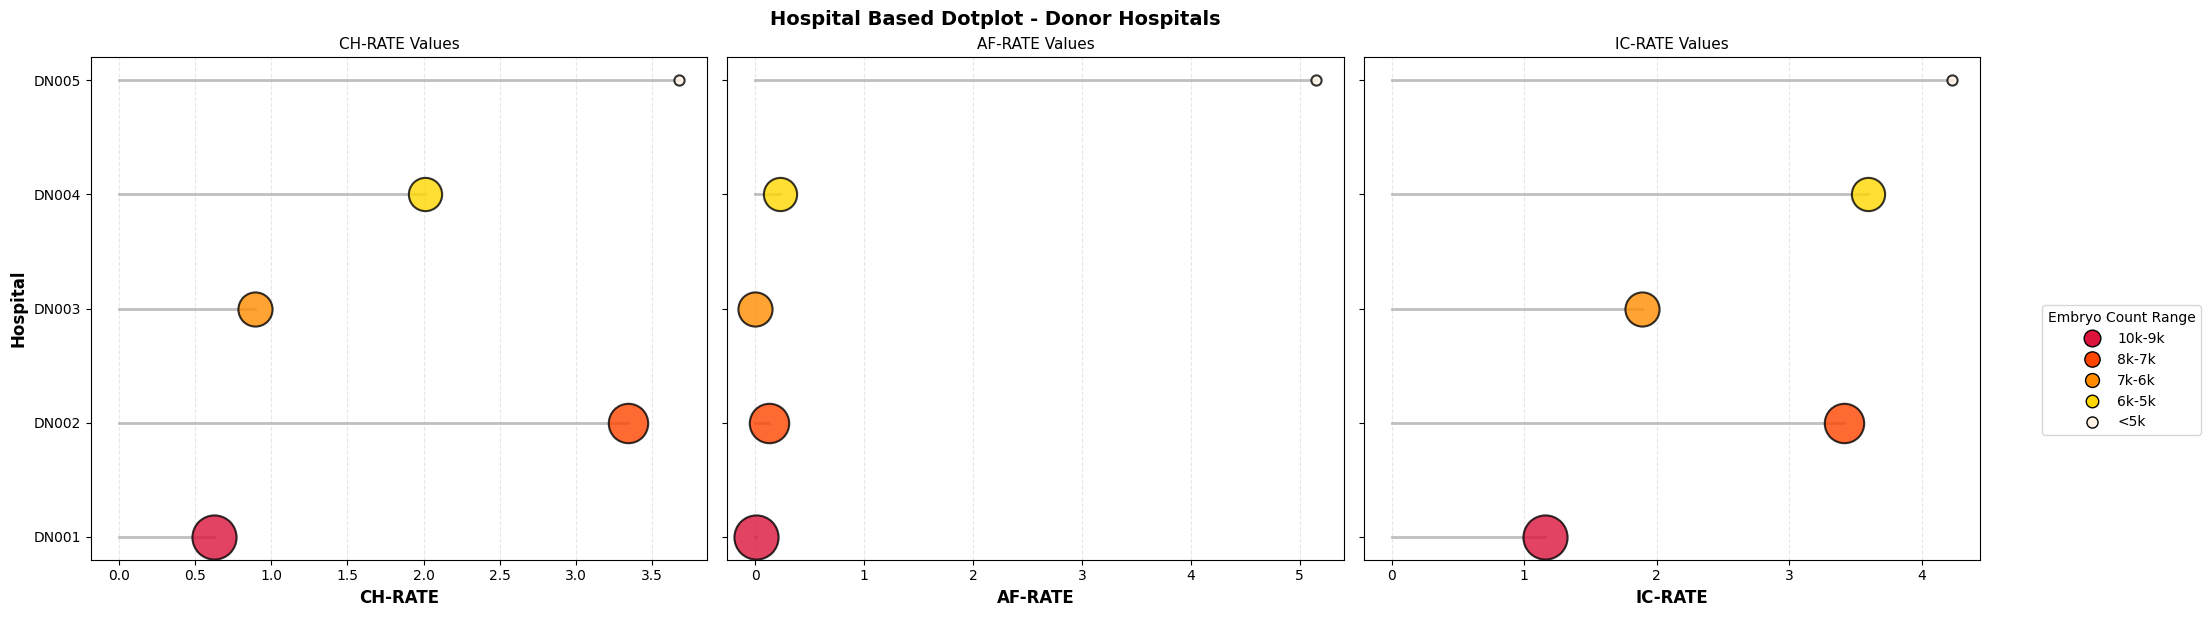

In [32]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.patches import Circle
from matplotlib.lines import Line2D

# Filter data for hospital_location == 2
filtered_data = data[data['hospital_location'] == 2].copy()

# Prepare data - add log_embryo_count column with proper scaling
filtered_data['log_embryo_count'] = filtered_data['embryo_count'] / 1000

# Define embryo count ranges and colors (more colorful gradient)
def get_embryo_color(count):
    if count >= 9000:
        return '#DC143C'  # Crimson red - Highest
    elif count >= 8000:
        return '#FF4500'  # Orange red
    elif count >= 6000:
        return '#FF8C00'  # Dark orange
    elif count >= 5000:
        return '#FFD700'  # Gold
    else:
        return '#FFF4E6'  # Very light orange - Lowest

filtered_data['embryo_color'] = filtered_data['embryo_count'].apply(get_embryo_color)

# Prepare plot
fig, axes = plt.subplots(1, 3, figsize=(20, 6), sharey=True)

# For each metric (CH-RATE, AF-RATE, IC-RATE)
metrics = ['CH-RATE', 'AF-RATE', 'IC-RATE']
colors = ['#FF6B6B', '#4ECDC4', '#45B7D1']

# Get hospital names
hospitals = filtered_data['hospital_id'].unique()

for idx, (ax, metric, color) in enumerate(zip(axes, metrics, colors)):
    # Scatter plot for each hospital
    for hospital in hospitals:
        hospital_data = filtered_data[filtered_data['hospital_id'] == hospital]
        
        for _, row in hospital_data.iterrows():
            # Draw line from y-axis to dot
            ax.plot([0, row[metric]], [hospital, hospital], 
                   color='gray', linewidth=2, alpha=0.5, zorder=1)
            
            # Draw dot with minimum size and gradient color
            dot_size = max(row['log_embryo_count'] * 100, 30)
            ax.scatter(row[metric], hospital,
                      s=dot_size,
                      alpha=0.8,
                      color=row['embryo_color'],
                      edgecolors='black',
                      linewidth=1.5,
                      zorder=2)
    
    ax.set_xlabel(metric, fontsize=12, fontweight='bold')
    ax.set_title(f'{metric} Values', fontsize=11)
    ax.grid(True, alpha=0.3, axis='x', linestyle='--')
    
    if idx == 0:
        ax.set_ylabel('Hospital', fontsize=12, fontweight='bold')

# Create legend for embryo count ranges (new intervals)
legend_elements = [
    Line2D([0], [0], marker='o', color='w', label='10k-9k',
           markerfacecolor='#DC143C', markersize=12, markeredgecolor='black'),
    Line2D([0], [0], marker='o', color='w', label='8k-7k',
           markerfacecolor='#FF4500', markersize=11, markeredgecolor='black'),
    Line2D([0], [0], marker='o', color='w', label='7k-6k',
           markerfacecolor='#FF8C00', markersize=10, markeredgecolor='black'),
    Line2D([0], [0], marker='o', color='w', label='6k-5k',
           markerfacecolor='#FFD700', markersize=9, markeredgecolor='black'),
    Line2D([0], [0], marker='o', color='w', label='<5k',
           markerfacecolor='#FFF4E6', markersize=8, markeredgecolor='black')
]

fig.legend(handles=legend_elements, title='Embryo Count Range', 
          loc='lower left', bbox_to_anchor=(1.02, 0.3), frameon=True, fontsize=10)

plt.tight_layout()
plt.suptitle('Hospital Based Dotplot - Donor Hospitals', 
             fontsize=14, fontweight='bold', y=1.02)
plt.show()

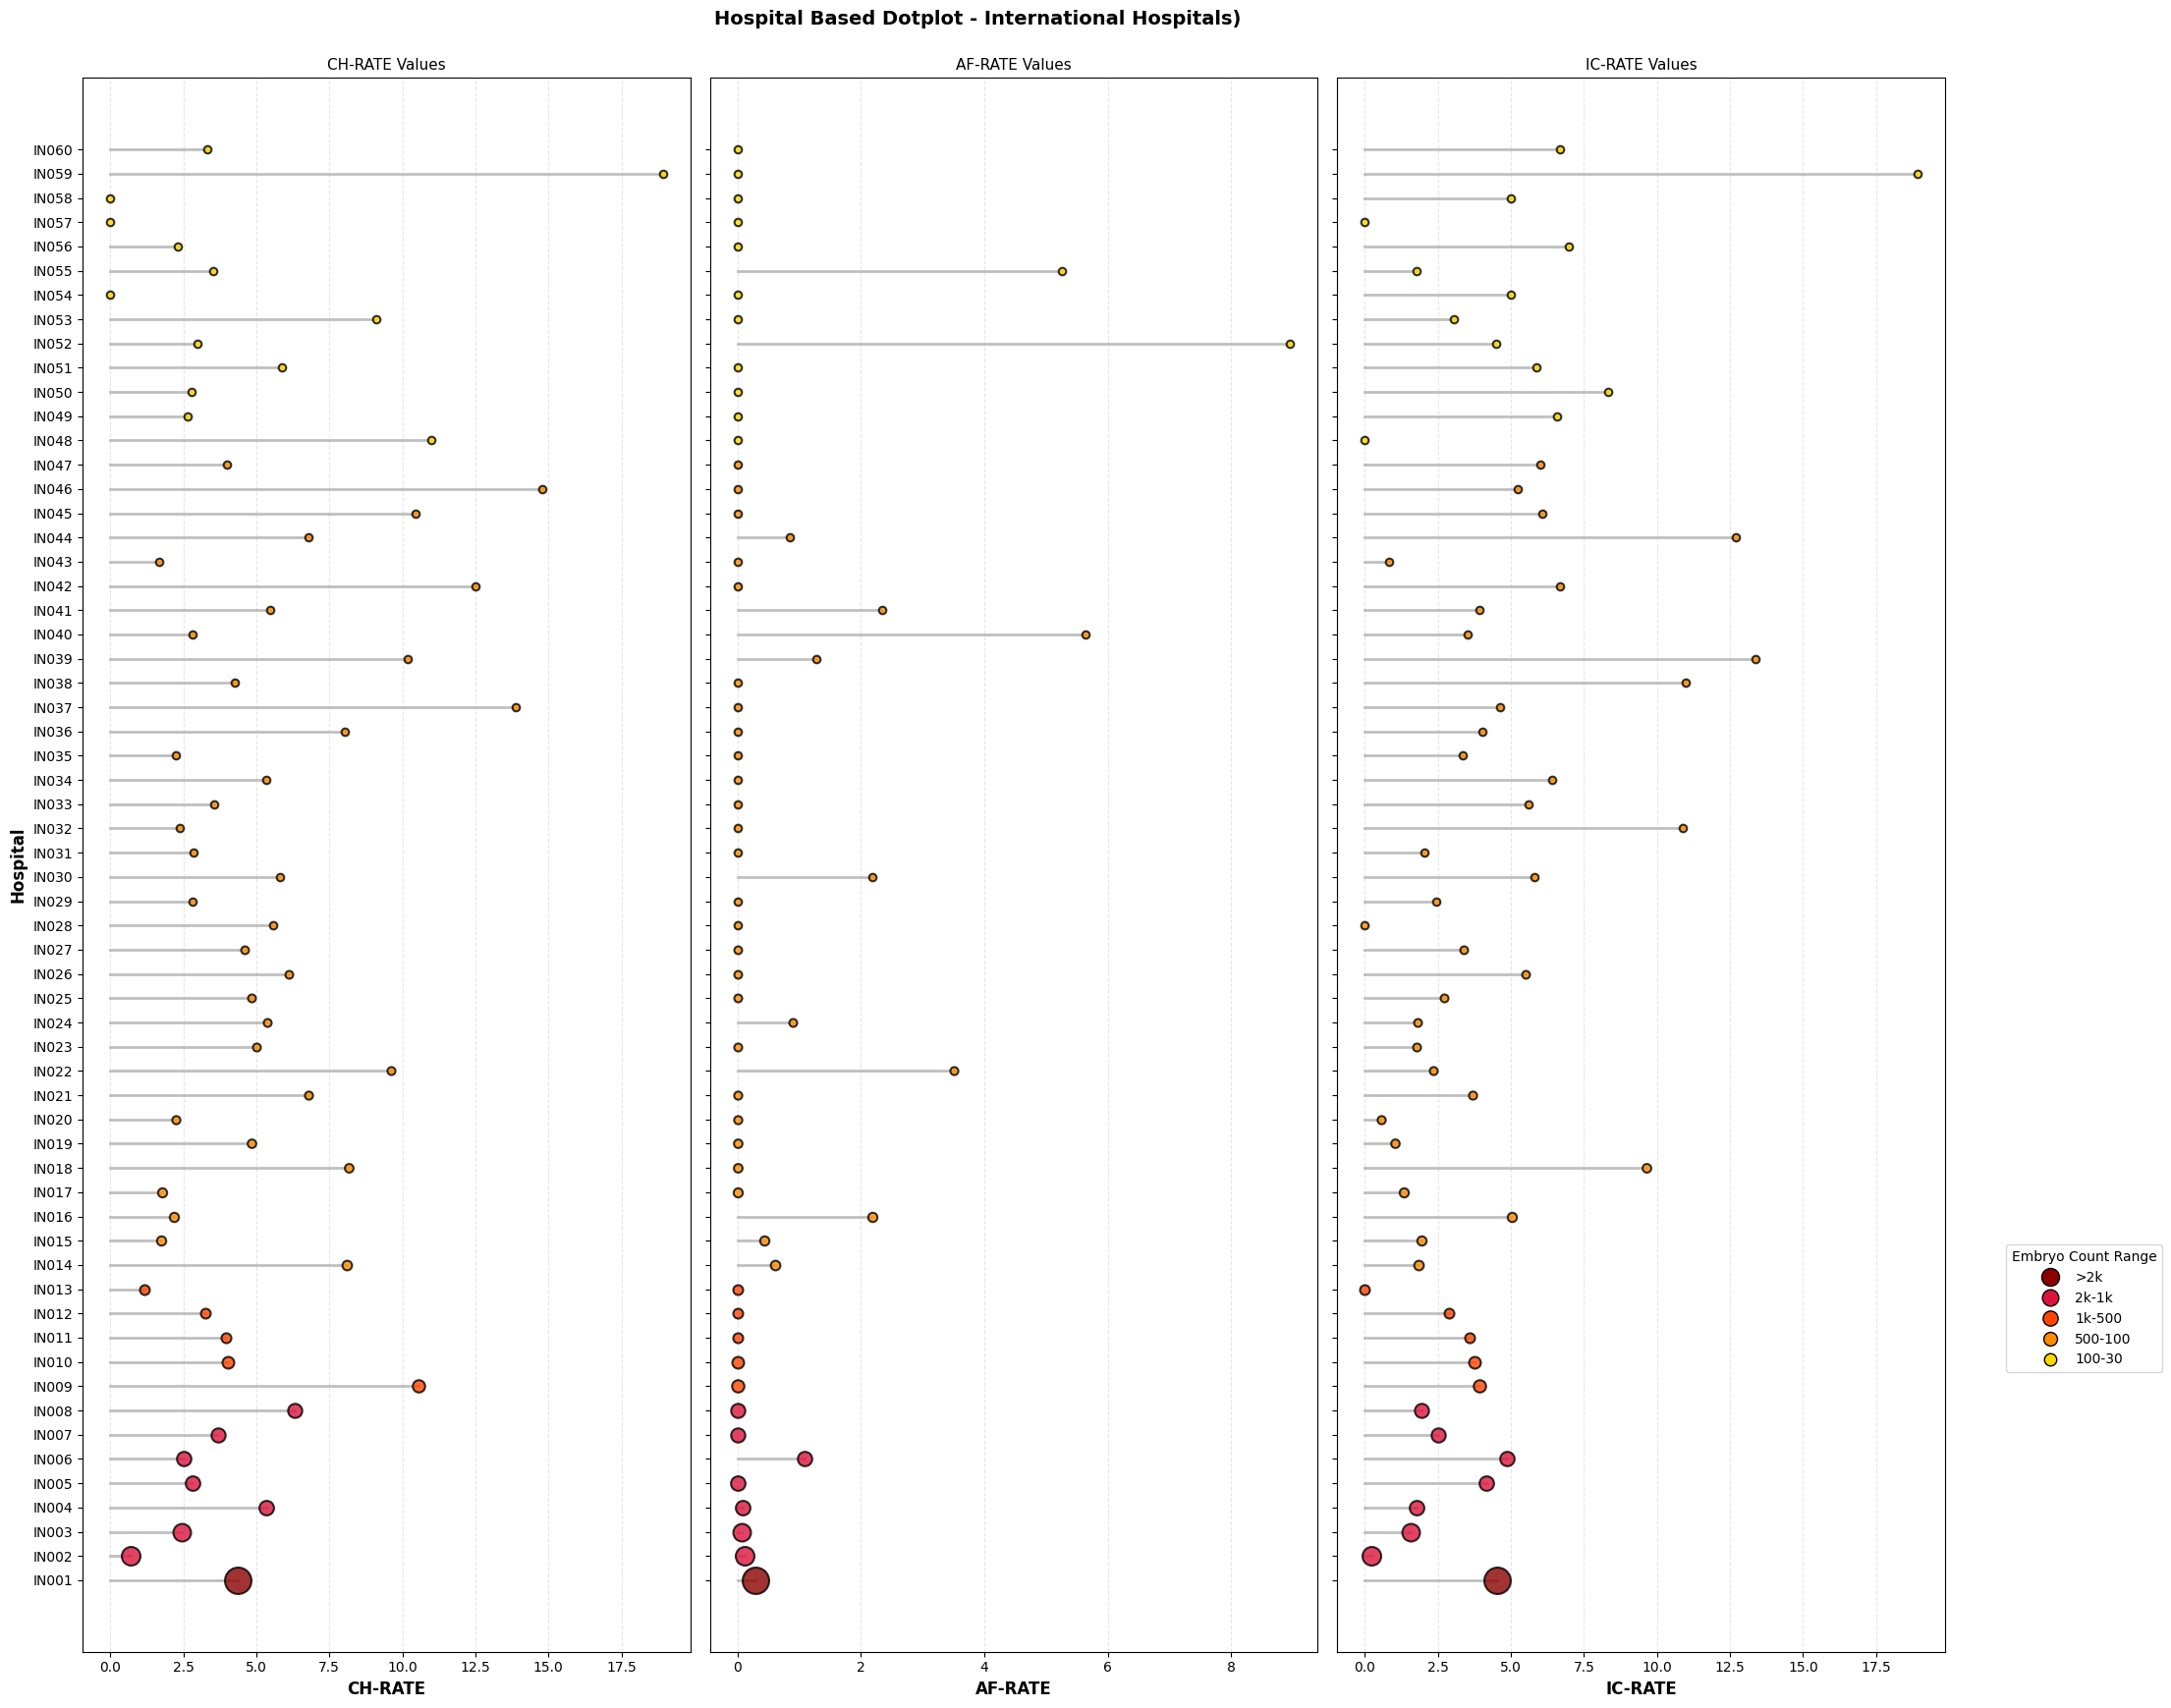

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.patches import Circle
from matplotlib.lines import Line2D

# Filter data for hospital_location == 0 and embryo_count > 29
filtered_data = data[(data['hospital_location'] == 0) & (data['embryo_count'] > 29)].copy()

# Prepare data - add log_embryo_count column with proper scaling
filtered_data['log_embryo_count'] = filtered_data['embryo_count'] / 1000

# Define embryo count ranges and colors (6 ranges)
def get_embryo_color(count):
    if count >= 2000:
        return '#8B0000'  # Dark red - 2k-3k+
    elif count >= 1000:
        return '#DC143C'  # Crimson red - 1k-2k
    elif count >= 500:
        return '#FF4500'  # Orange red - 500-1k
    elif count >= 100:
        return '#FF8C00'  # Dark orange - 100-500
    elif count >= 30:
        return '#FFD700'  # Gold - 30-100
    else:
        return '#FFF4E6'  # Very light orange

filtered_data['embryo_color'] = filtered_data['embryo_count'].apply(get_embryo_color)

# Prepare plot
fig, axes = plt.subplots(1, 3, figsize=(20, 17), sharey=True)

# For each metric (CH-RATE, AF-RATE, IC-RATE)
metrics = ['CH-RATE', 'AF-RATE', 'IC-RATE']
colors = ['#FF6B6B', '#4ECDC4', '#45B7D1']

# Get hospital names
hospitals = filtered_data['hospital_id'].unique()

for idx, (ax, metric, color) in enumerate(zip(axes, metrics, colors)):
    # Scatter plot for each hospital
    for hospital in hospitals:
        hospital_data = filtered_data[filtered_data['hospital_id'] == hospital]
        
        for _, row in hospital_data.iterrows():
            # Draw line from y-axis to dot
            ax.plot([0, row[metric]], [hospital, hospital], 
                   color='gray', linewidth=2, alpha=0.5, zorder=1)
            
            # Draw dot with minimum size and gradient color
            dot_size = max(row['log_embryo_count'] * 100, 30)
            ax.scatter(row[metric], hospital,
                      s=dot_size,
                      alpha=0.8,
                      color=row['embryo_color'],
                      edgecolors='black',
                      linewidth=1.5,
                      zorder=2)
    
    ax.set_xlabel(metric, fontsize=12, fontweight='bold')
    ax.set_title(f'{metric} Values', fontsize=11)
    ax.grid(True, alpha=0.3, axis='x', linestyle='--')
    
    if idx == 0:
        ax.set_ylabel('Hospital', fontsize=12, fontweight='bold')

# Create legend for embryo count ranges
legend_elements = [
    Line2D([0], [0], marker='o', color='w', label='>2k',
           markerfacecolor='#8B0000', markersize=13, markeredgecolor='black'),
    Line2D([0], [0], marker='o', color='w', label='2k-1k',
           markerfacecolor='#DC143C', markersize=12, markeredgecolor='black'),
    Line2D([0], [0], marker='o', color='w', label='1k-500',
           markerfacecolor='#FF4500', markersize=11, markeredgecolor='black'),
    Line2D([0], [0], marker='o', color='w', label='500-100',
           markerfacecolor='#FF8C00', markersize=10, markeredgecolor='black'),
    Line2D([0], [0], marker='o', color='w', label='100-30',
           markerfacecolor='#FFD700', markersize=9, markeredgecolor='black')
]

fig.legend(handles=legend_elements, title='Embryo Count Range', 
          loc='lower left', bbox_to_anchor=(1.02, 0.2), frameon=True, fontsize=10)

plt.tight_layout()
plt.suptitle('Hospital Based Dotplot - International Hospitals', 
             fontsize=14, fontweight='bold', y=1.02)
plt.show()

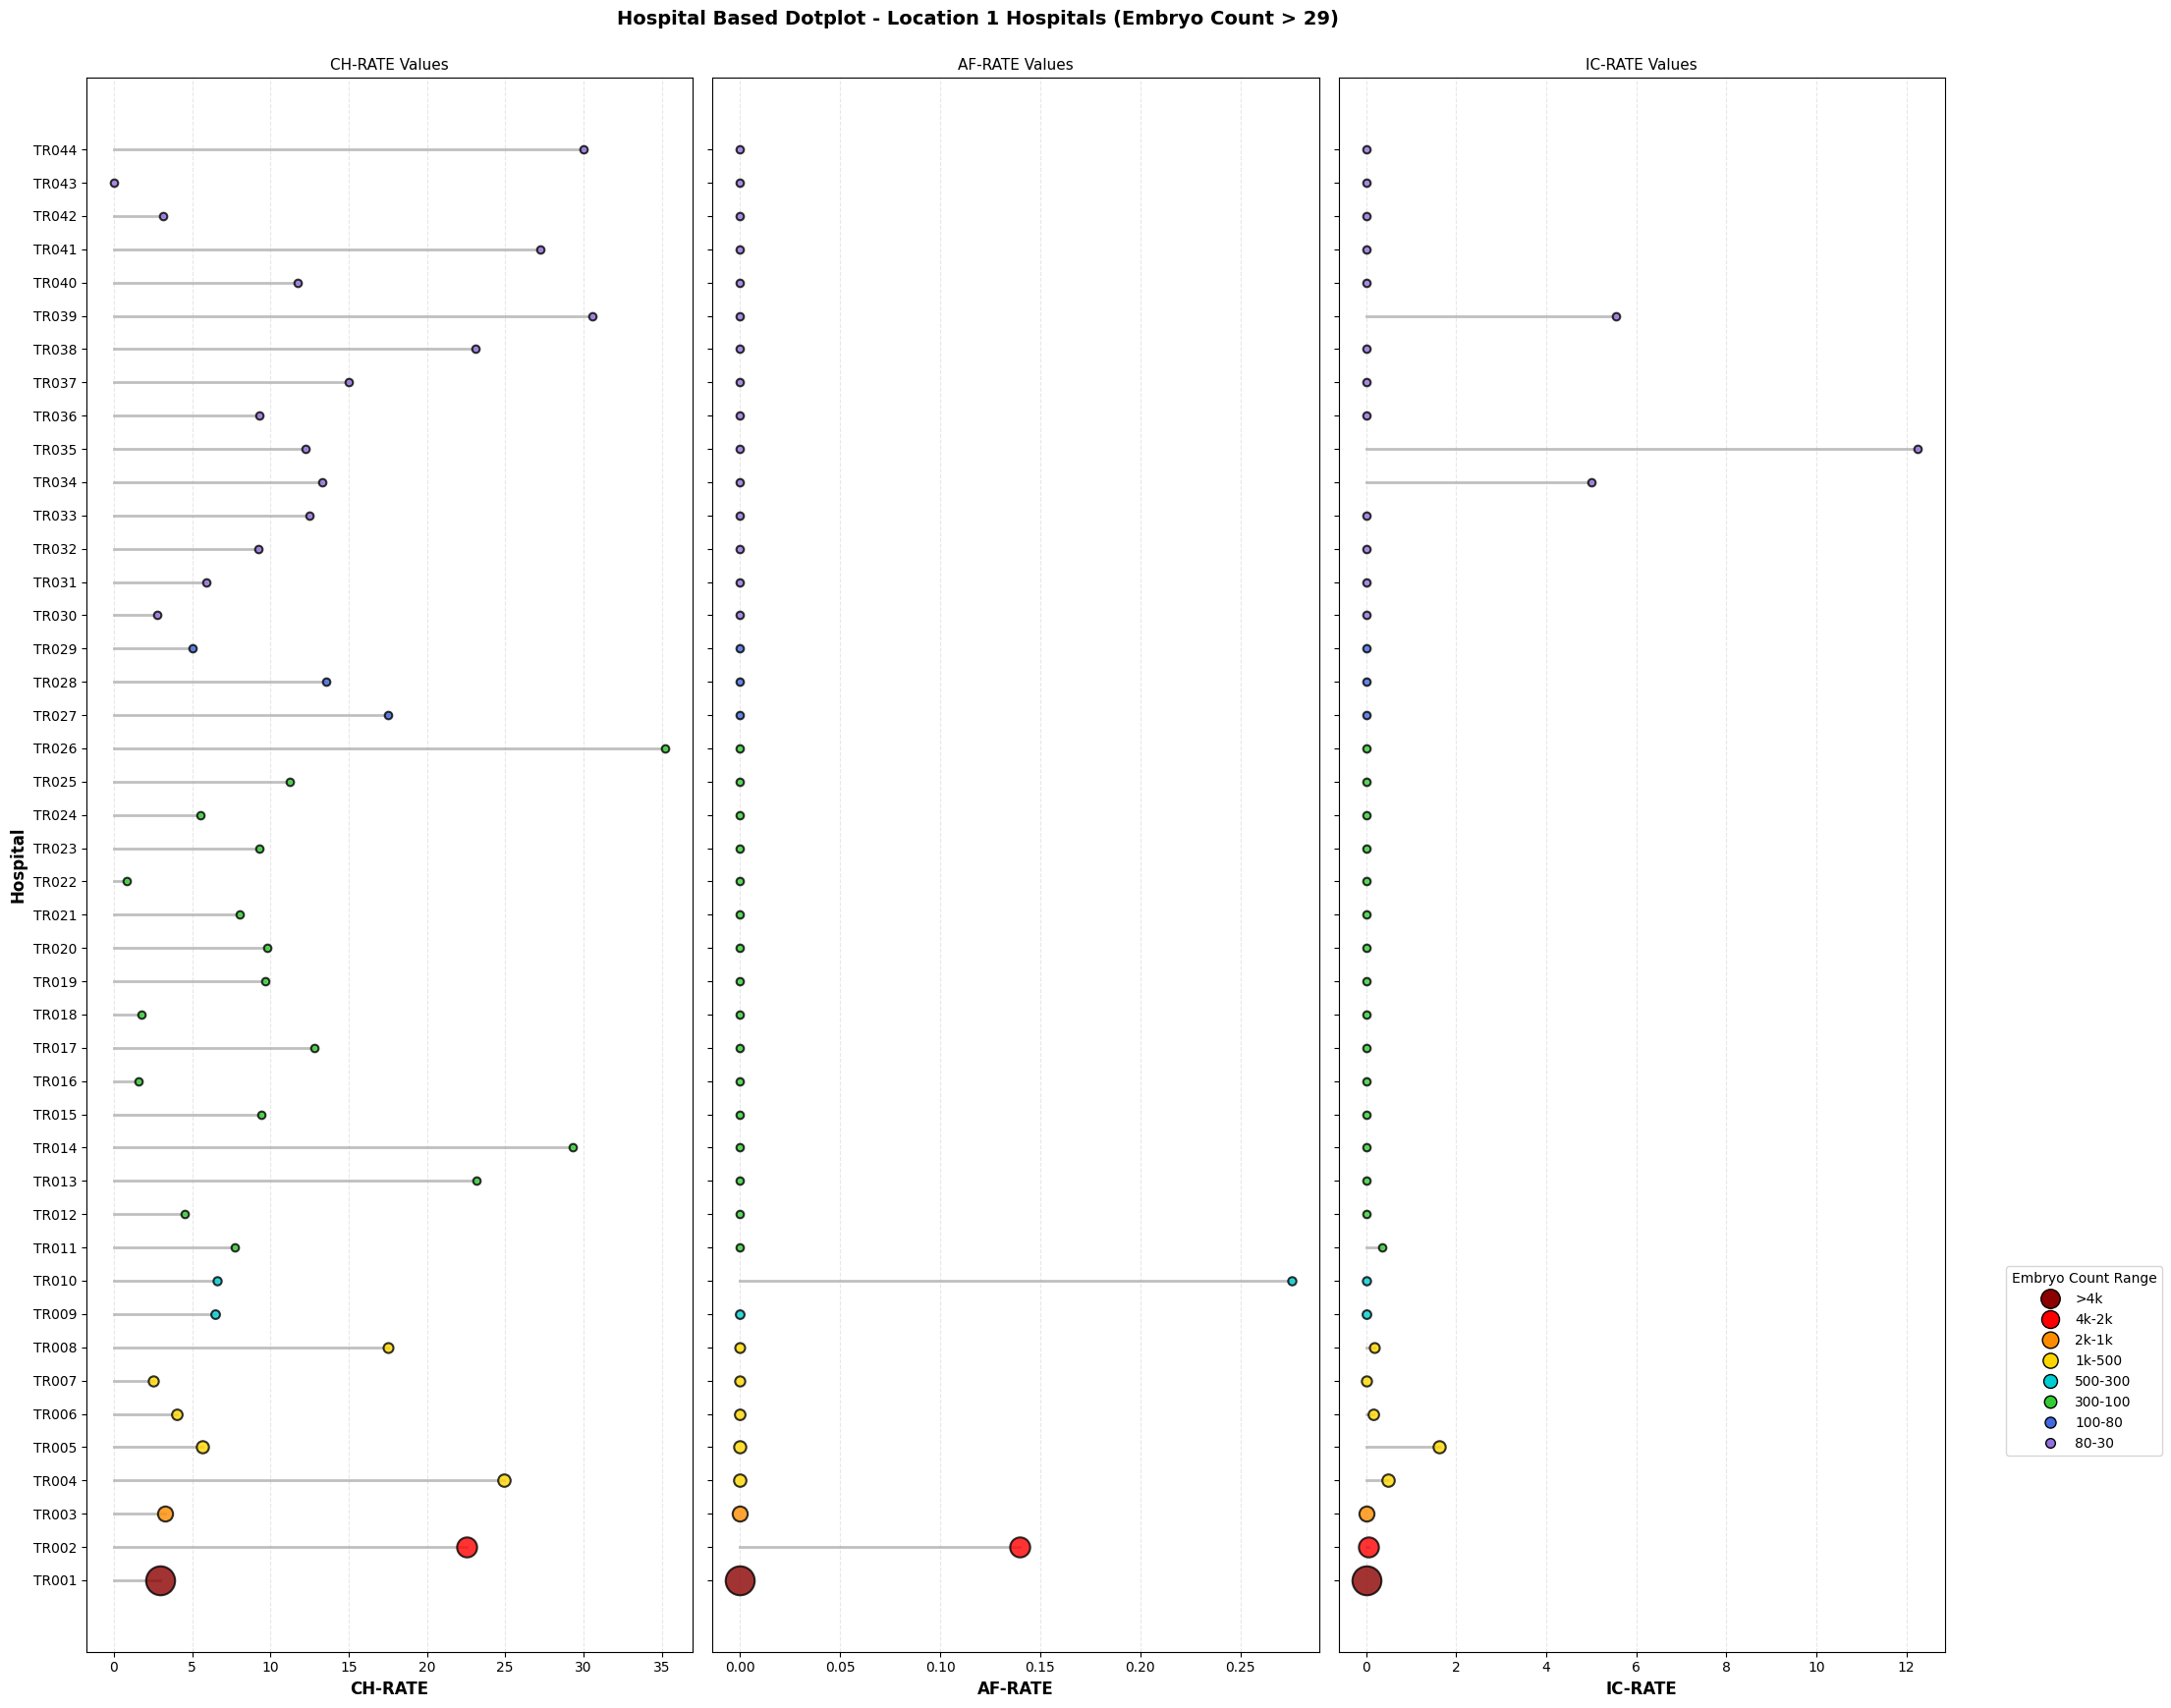

In [53]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.patches import Circle
from matplotlib.lines import Line2D

# Filter data for hospital_location == 1 and embryo_count > 29
filtered_data = data[(data['hospital_location'] == 1) & (data['embryo_count'] > 29)].copy()

# Prepare data - add log_embryo_count column with proper scaling
filtered_data['log_embryo_count'] = filtered_data['embryo_count'] / 1000

# Define embryo count ranges and colors (8 ranges with diverse colors)
def get_embryo_color(count):
    if count > 4000:
        return '#8B0000'  # Dark red - >4k
    elif count >= 2000:
        return '#FF0000'  # Red - 4k-2k
    elif count >= 1000:
        return '#FF8C00'  # Dark orange - 2k-1k
    elif count >= 500:
        return '#FFD700'  # Gold - 1k-500
    elif count >= 300:
        return '#00CED1'  # Dark turquoise - 500-300
    elif count >= 100:
        return '#32CD32'  # Lime green - 300-100
    elif count >= 80:
        return '#4169E1'  # Royal blue - 100-80
    else:
        return '#9370DB'  # Medium purple - 80-30

filtered_data['embryo_color'] = filtered_data['embryo_count'].apply(get_embryo_color)

# Prepare plot
fig, axes = plt.subplots(1, 3, figsize=(20, 17), sharey=True)

# For each metric (CH-RATE, AF-RATE, IC-RATE)
metrics = ['CH-RATE', 'AF-RATE', 'IC-RATE']
colors = ['#FF6B6B', '#4ECDC4', '#45B7D1']

# Get hospital names
hospitals = filtered_data['hospital_id'].unique()

for idx, (ax, metric, color) in enumerate(zip(axes, metrics, colors)):
    # Scatter plot for each hospital
    for hospital in hospitals:
        hospital_data = filtered_data[filtered_data['hospital_id'] == hospital]
        
        for _, row in hospital_data.iterrows():
            # Draw line from y-axis to dot
            ax.plot([0, row[metric]], [hospital, hospital], 
                   color='gray', linewidth=2, alpha=0.5, zorder=1)
            
            # Draw dot with minimum size and gradient color
            dot_size = max(row['log_embryo_count'] * 100, 30)
            ax.scatter(row[metric], hospital,
                      s=dot_size,
                      alpha=0.8,
                      color=row['embryo_color'],
                      edgecolors='black',
                      linewidth=1.5,
                      zorder=2)
    
    ax.set_xlabel(metric, fontsize=12, fontweight='bold')
    ax.set_title(f'{metric} Values', fontsize=11)
    ax.grid(True, alpha=0.3, axis='x', linestyle='--')
    
    if idx == 0:
        ax.set_ylabel('Hospital', fontsize=12, fontweight='bold')

# Create legend for embryo count ranges (8 categories with diverse colors)
legend_elements = [
    Line2D([0], [0], marker='o', color='w', label='>4k',
           markerfacecolor='#8B0000', markersize=14, markeredgecolor='black'),
    Line2D([0], [0], marker='o', color='w', label='4k-2k',
           markerfacecolor='#FF0000', markersize=13, markeredgecolor='black'),
    Line2D([0], [0], marker='o', color='w', label='2k-1k',
           markerfacecolor='#FF8C00', markersize=12, markeredgecolor='black'),
    Line2D([0], [0], marker='o', color='w', label='1k-500',
           markerfacecolor='#FFD700', markersize=11, markeredgecolor='black'),
    Line2D([0], [0], marker='o', color='w', label='500-300',
           markerfacecolor='#00CED1', markersize=10, markeredgecolor='black'),
    Line2D([0], [0], marker='o', color='w', label='300-100',
           markerfacecolor='#32CD32', markersize=9, markeredgecolor='black'),
    Line2D([0], [0], marker='o', color='w', label='100-80',
           markerfacecolor='#4169E1', markersize=8, markeredgecolor='black'),
    Line2D([0], [0], marker='o', color='w', label='80-30',
           markerfacecolor='#9370DB', markersize=7, markeredgecolor='black')
]

fig.legend(handles=legend_elements, title='Embryo Count Range', 
          loc='lower left', bbox_to_anchor=(1.02, 0.15), frameon=True, fontsize=10)

plt.tight_layout()
plt.suptitle('Hospital Based Dotplot - Location 1 Hospitals (Embryo Count > 29)', 
             fontsize=14, fontweight='bold', y=1.02)
plt.show()